In [104]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook
nx = 1001
xmax = 1000.0 # micrometers
L_from_source = xmax
x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print 'dx =', dx

D_SI_300 = 24.0e-6 # m^2/s
D_300 = D_SI_300 * 1e6  # um^2/us
Temp = 240.0
Pressure = .2
acoef = 2.072
D = D_300*(Temp/300)**acoef/(Pressure/1.0); print D_300, D
D_SI = D / 1e6 # back in SI

dx2 = dx**2


dx = 1.0
24.0 75.5759646298


In [105]:
def propagate(u0):
    un[1:-1] = u0[1:-1] + ( \
    (u0[2:] - 2*u0[1:-1] + u0[:-2])*Dxeff)

    # Dirichlet on the left boundary
    un[0] = udirichletL
    
    # Neumann on the right boundary
    un[-1] = u0[-1] +(u0[-2] - u0[-1])*Dxeff -gneumanneff
    
    return un


def propagateD(u0):
    un[1:-1] = u0[1:-1] + ( \
    (u0[2:] - 2*u0[1:-1] + u0[:-2])*Dxeff)

    # Dirichlet on the left boundary
    un[0] = udirichletL
    
    # Dirichlet on the right boundary
    un[-1] = udirichletR
    
    return un


In [113]:
# Using Libbrecht's alpha_diffusion formula (Libbrecht 2003, "Growth Rates" paper)
m = 0.018 # molar mass, kg/mol
r = 8.314 # gas constant, J/mol-K
R = 25.0e-6 # radius of particle, meters
alpha_diff = D_SI/R*np.sqrt(2*np.pi*m/(r*Temp))
print 'alpha diffusion', alpha_diff


# Other guesses
Afactor = .2*np.exp(.19/.2); print Afactor
sigma0 = 0.19
stest = np.linspace(.2,.01,10); #print stest
alphatest = Afactor*np.exp(-sigma0/stest); #print alphatest
nu_kin = 50
gneumann_test = nu_kin*stest*alphatest; print gneumann_test

alpha diffusion 0.0227593181181
0.517141931863
[  2.00000000e+00   1.59916704e+00   1.22359352e+00   8.79968456e-01
   5.77152043e-01   3.26631348e-01   1.42122770e-01   3.55093250e-02
   1.79141760e-03   1.44872049e-09]


In [107]:
udirichletL = 0.20
dt = dx2/D/10; print 'dt', dt
gneumann = Afactor*np.exp(-sigma0/udirichletL)*udirichletL*nu_kin; print gneumann
gneumanneff = gneumann*dt/dx; print 'gneumann_eff', gneumanneff
Dxeff = D*dt/dx2

# initialize  
u0 = np.ones(nx)*udirichletL # old u values 
un = np.ones(nx)*udirichletL # old u values 


dt 0.00132317199641
2.0
gneumann_eff 0.00264634399282


In [108]:
un = propagate(u0)
# plt.figure()
# plt.plot(x,un)

3778798


<IPython.core.display.Javascript object>


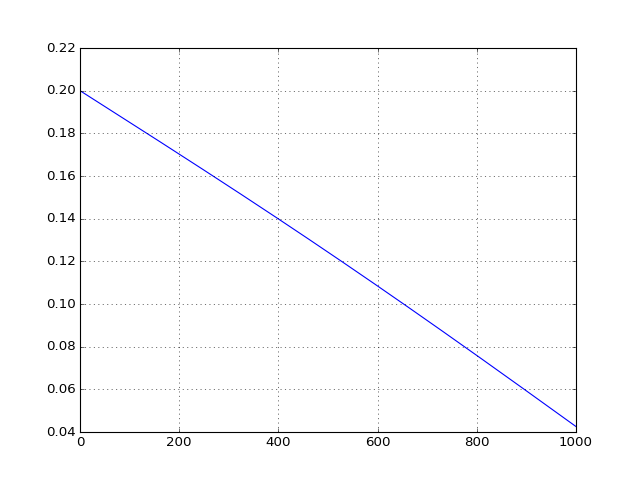

In [109]:
timeperiod = 5000.0 # microsecond
ntimes = int(timeperiod/dt); print ntimes
time = 0.0
for i in range(ntimes):
    time += dt
    sigma_surf = un[-1]
    alpha = Afactor*np.exp(-sigma0/sigma_surf)
    gneumann = alpha*sigma_surf*nu_kin; #print gneumann
    gneumanneff = gneumann*dt/dx
    un = propagate(un)
plt.figure()
plt.plot(x,un)
plt.grid('on')

In [112]:
print 'time', time
print 'sigma0', sigma0
print 'sigma_surf', sigma_surf
print 'alpha', alpha
print 'alpha_inf', gneumann/udirichletL/nu_kin
print 'gneumann', gneumann
print 'sigma_inf', udirichletL


time 4999.99969374
sigma0 0.19
sigma_surf 0.042556966151
alpha 0.00595191726596
alpha_inf 0.0012664777081
gneumann 0.012664777081
sigma_inf 0.2


In [111]:
nu_kin

50